<a href="https://colab.research.google.com/github/Avrova/-/blob/main/final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1. Данные из прошлого дз

In [19]:
import pandas as pd

df = pd.read_csv('kc-house-data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.2 Изучите стоимости недвижимости

In [21]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

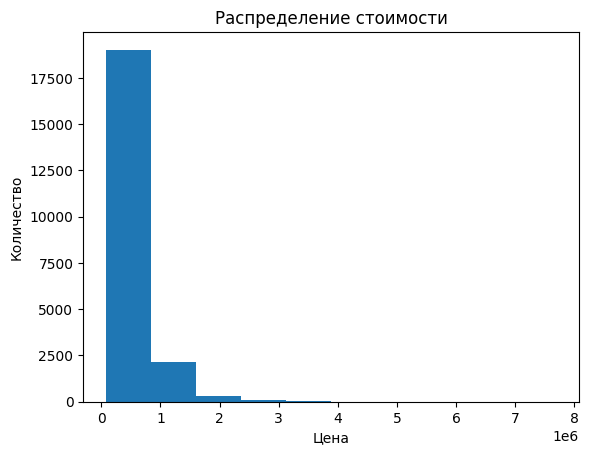

In [22]:
plt.hist(df['price'])
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

# 1.3. Изучите распределение квадратуры жилой

Text(0, 0.5, 'Количество')

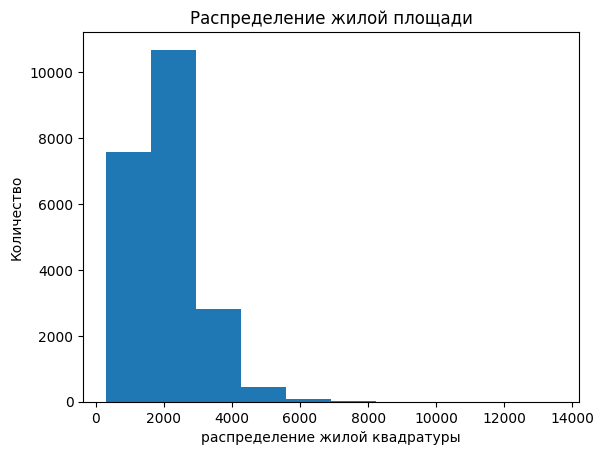

In [23]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('распределение жилой квадратуры')
plt.ylabel('Количество')

# 1.4. Изучите распределение года постройки

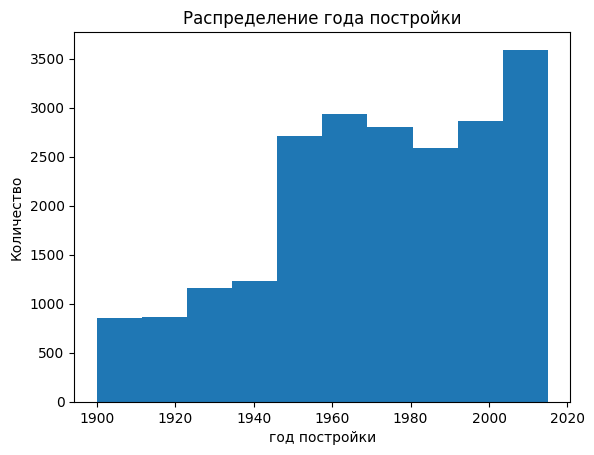

In [24]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество');

# 2.1. Изучите распределение домов от наличия вида на набережную

In [26]:
def calcExplodes(data):
    exp = []
    k = 1
    for val in data.values:
        if val < data.values.sum() / 20:
            exp.append(0.3 * k)
            k += 1
        else:
            exp.append(0)
    return exp

Text(0.5, 1.0, 'Распределение в зависимости от вида на набережную')

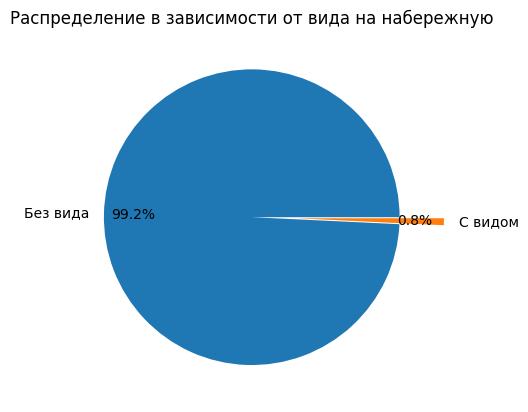

In [28]:
data = df['waterfront'].value_counts()
data.index = [
    "Без вида",
    "С видом"
]
plt.pie(
    data.values,
    labels=data.index,
    autopct='%1.1f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)
plt.title("Распределение в зависимости от вида на набережную")

# 2.2. Изучите распределение этажей домов

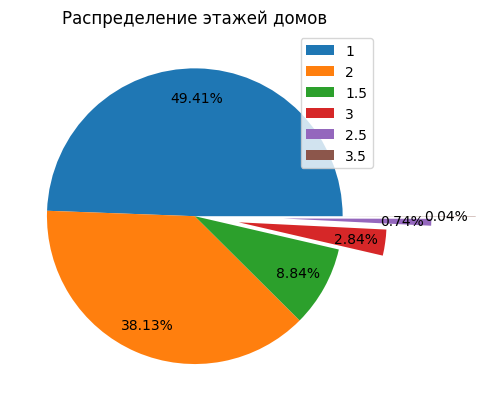

In [29]:
data = df['floors'].value_counts()
data.index = [
    str(el).split(".")[0]
    if el % 1 == 0
    else str(el)
    for el in data.index
]

plt.pie(
    data,
    autopct='%1.2f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)

plt.legend(data.index)
plt.title("Распределение этажей домов");

# 2.3. Изучите распределение состояния домов

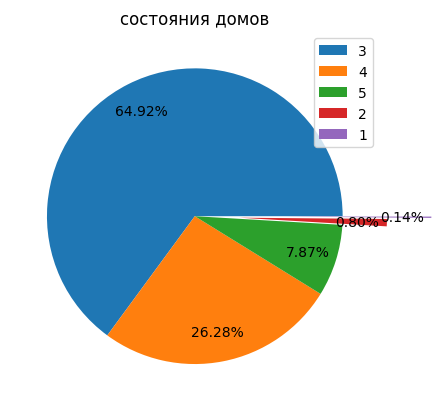

In [31]:
data = df['condition'].value_counts()

plt.pie(
    data,
    autopct='%1.2f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)

plt.legend(data.index)
plt.title("состояния домов");

# 3. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [32]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

<ipython-input-32-a439e4510211>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


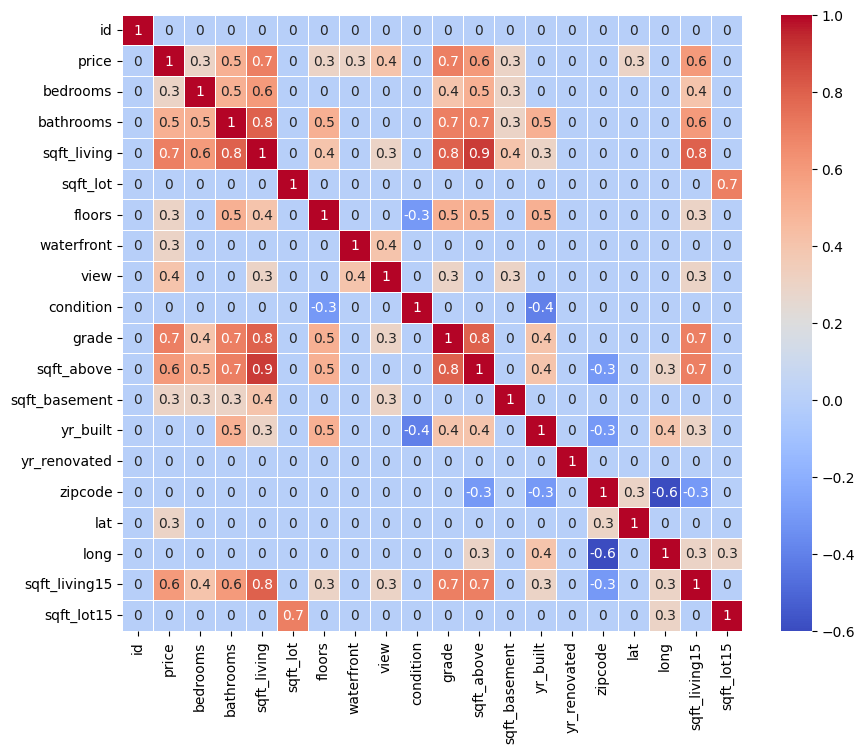

In [33]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');